# ADC 프로젝트 ML 분석 검증

##### 데이터쿱와 주식회사 | 고우주 대표

## 1. Auto ML 결과

## 2. Python Machine Learning 분석

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/GrowthLog_20191205_errorFiltered.csv')
df.head()

,elapseTime,radius,radiusSet,RFPowerVoltage,RFPowerCurrent,RFPower,RFPowerPercent,RFPowerPercentSet,RFPowerCtrlVoltage,MotorArotAng,MotorBrotAng,MotorAspeed,MotorBspeed,MotorACtrlVoltage,MotorBCtrlVoltage,weight,height,growthHeight,growthHeightSet,dateTime
0,8793.546421,4.778328,10.0,80.9,16.3,1318.67,3.296675,3.244313,1.239512,-1578501.54,-2369077.20,-5310.571897,-5596.846667,1.396685,1.5,15.614049,14.829902,15.944781,15.242548,2019-12-04 15:28:58Z
1,8793.796491,4.870199,10.0,80.9,16.0,1294.40,3.236000,3.243971,1.239250,-1579738.86,-2370450.24,-5310.571897,-5596.846667,1.396685,1.5,15.594003,14.830329,15.945522,15.242993,2019-12-04 15:28:59Z
2,8794.046955,4.916224,10.0,80.9,16.2,1310.58,3.276450,3.243632,1.239290,-1581285.06,-2372113.98,-5310.571897,-5596.846667,1.396685,1.5,15.594681,14.831245,15.946264,15.243947,2019-12-04 15:28:59Z
3,8794.302287,4.961740,10.0,80.9,15.9,1286.31,3.215775,3.243297,1.239328,-1582267.14,-2373567.30,-5310.571897,-5596.846667,1.396685,1.5,15.545984,14.832216,15.947021,15.244959,2019-12-04 15:28:59Z
4,8794.548455,5.004508,10.0,80.9,16.2,1310.58,3.276450,3.242963,1.239300,-1583928.18,-2374906.50,-5310.571897,-5596.846667,1.396685,1.5,15.548930,14.832643,15.947750,15.245403,2019-12-04 15:28:59Z


In [3]:
df.shape

(28417, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28417 entries, 0 to 28416
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   elapseTime           28417 non-null  float64
 1    radius              28417 non-null  float64
 2    radiusSet           28417 non-null  float64
 3    RFPowerVoltage      28417 non-null  float64
 4    RFPowerCurrent      28417 non-null  float64
 5    RFPower             28417 non-null  float64
 6    RFPowerPercent      28417 non-null  float64
 7    RFPowerPercentSet   28417 non-null  float64
 8    RFPowerCtrlVoltage  28417 non-null  float64
 9    MotorArotAng        28417 non-null  float64
 10   MotorBrotAng        28417 non-null  float64
 11   MotorAspeed         28417 non-null  float64
 12   MotorBspeed         28417 non-null  float64
 13   MotorACtrlVoltage   28417 non-null  float64
 14   MotorBCtrlVoltage   28417 non-null  float64
 15   weight              28417 non-null 

### - Pre-Processing

In [5]:
df = df.rename(columns=lambda x: x.strip())
df.head()

,elapseTime,radius,radiusSet,RFPowerVoltage,RFPowerCurrent,RFPower,RFPowerPercent,RFPowerPercentSet,RFPowerCtrlVoltage,MotorArotAng,MotorBrotAng,MotorAspeed,MotorBspeed,MotorACtrlVoltage,MotorBCtrlVoltage,weight,height,growthHeight,growthHeightSet,dateTime
0,8793.546421,4.778328,10.0,80.9,16.3,1318.67,3.296675,3.244313,1.239512,-1578501.54,-2369077.20,-5310.571897,-5596.846667,1.396685,1.5,15.614049,14.829902,15.944781,15.242548,2019-12-04 15:28:58Z
1,8793.796491,4.870199,10.0,80.9,16.0,1294.40,3.236000,3.243971,1.239250,-1579738.86,-2370450.24,-5310.571897,-5596.846667,1.396685,1.5,15.594003,14.830329,15.945522,15.242993,2019-12-04 15:28:59Z
2,8794.046955,4.916224,10.0,80.9,16.2,1310.58,3.276450,3.243632,1.239290,-1581285.06,-2372113.98,-5310.571897,-5596.846667,1.396685,1.5,15.594681,14.831245,15.946264,15.243947,2019-12-04 15:28:59Z
3,8794.302287,4.961740,10.0,80.9,15.9,1286.31,3.215775,3.243297,1.239328,-1582267.14,-2373567.30,-5310.571897,-5596.846667,1.396685,1.5,15.545984,14.832216,15.947021,15.244959,2019-12-04 15:28:59Z
4,8794.548455,5.004508,10.0,80.9,16.2,1310.58,3.276450,3.242963,1.239300,-1583928.18,-2374906.50,-5310.571897,-5596.846667,1.396685,1.5,15.548930,14.832643,15.947750,15.245403,2019-12-04 15:28:59Z


In [6]:
df.columns

Index(['elapseTime', 'radius', 'radiusSet', 'RFPowerVoltage', 'RFPowerCurrent',
       'RFPower', 'RFPowerPercent', 'RFPowerPercentSet', 'RFPowerCtrlVoltage',
       'MotorArotAng', 'MotorBrotAng', 'MotorAspeed', 'MotorBspeed',
       'MotorACtrlVoltage', 'MotorBCtrlVoltage', 'weight', 'height',
       'growthHeight', 'growthHeightSet', 'dateTime'],
      dtype='object')

In [7]:
df['radius'] = df['radius'].astype('float32')

In [8]:
# df = df.drop('Unnamed: 20', axis=1)

In [9]:
df.describe()

,elapseTime,radius,radiusSet,RFPowerVoltage,RFPowerCurrent,RFPower,RFPowerPercent,RFPowerPercentSet,RFPowerCtrlVoltage,MotorArotAng,MotorBrotAng,MotorAspeed,MotorBspeed,MotorACtrlVoltage,MotorBCtrlVoltage,weight,height,growthHeight,growthHeightSet
count,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000,2.841700e+04,2.841700e+04,28417.000000,28417.000000,2.841700e+04,28417.0,28417.000000,28417.000000,28417.000000,28417.000000
mean,12357.826648,9.274283,9.092561,80.277535,16.013418,1285.706268,3.214266,3.214610,1.230146,-2.043511e+07,-2.257845e+07,-5290.720610,-5670.236521,1.396685e+00,1.5,41.259053,25.247305,26.761908,26.084034
std,2069.210208,1.959032,2.154832,0.956817,0.248758,33.604407,0.084011,0.079208,0.018318,1.094724e+07,1.173258e+07,68.291701,72.225137,7.916029e-13,0.0,14.318910,6.047847,6.241247,6.284186
min,8793.546421,0.152485,0.692155,78.400000,15.400000,1207.360000,3.018400,3.066819,1.194410,-4.066540e+07,-4.426025e+07,-5606.133331,-5972.627790,1.396685e+00,1.5,15.486530,14.829902,15.944781,15.242548
25%,10569.548980,9.405920,9.797365,79.600000,15.800000,1264.000000,3.160000,3.157852,1.217321,-2.978947e+07,-3.260401e+07,-5333.143595,-5714.217816,1.396685e+00,1.5,29.017083,20.020813,21.357298,20.649747
50%,12349.269090,9.833349,10.000000,80.000000,16.000000,1280.000000,3.200000,3.193179,1.225105,-2.038943e+07,-2.252994e+07,-5290.132381,-5668.785209,1.396685e+00,1.5,41.503613,25.221968,26.767947,26.067616
75%,14125.955110,10.114801,10.000000,80.800000,16.200000,1302.490000,3.256225,3.247390,1.238369,-1.097417e+07,-1.243884e+07,-5247.266558,-5625.529855,1.396685e+00,1.5,54.529007,30.415411,32.178944,31.476479
max,16181.643650,12.384785,10.000000,82.900000,16.800000,1392.720000,3.481800,3.431854,1.280402,-1.578502e+06,-2.369077e+06,-4961.686428,-5295.492955,1.396685e+00,1.5,62.003393,36.423870,37.514292,37.592362


### - 결측치 제거

In [10]:
df.isnull().sum()

elapseTime            0
radius                0
radiusSet             0
RFPowerVoltage        0
RFPowerCurrent        0
RFPower               0
RFPowerPercent        0
RFPowerPercentSet     0
RFPowerCtrlVoltage    0
MotorArotAng          0
MotorBrotAng          0
MotorAspeed           0
MotorBspeed           0
MotorACtrlVoltage     0
MotorBCtrlVoltage     0
weight                0
height                0
growthHeight          0
growthHeightSet       0
dateTime              0
dtype: int64

In [11]:
df.isnull().sum()

elapseTime            0
radius                0
radiusSet             0
RFPowerVoltage        0
RFPowerCurrent        0
RFPower               0
RFPowerPercent        0
RFPowerPercentSet     0
RFPowerCtrlVoltage    0
MotorArotAng          0
MotorBrotAng          0
MotorAspeed           0
MotorBspeed           0
MotorACtrlVoltage     0
MotorBCtrlVoltage     0
weight                0
height                0
growthHeight          0
growthHeightSet       0
dateTime              0
dtype: int64

In [12]:
df.head()

,elapseTime,radius,radiusSet,RFPowerVoltage,RFPowerCurrent,RFPower,RFPowerPercent,RFPowerPercentSet,RFPowerCtrlVoltage,MotorArotAng,MotorBrotAng,MotorAspeed,MotorBspeed,MotorACtrlVoltage,MotorBCtrlVoltage,weight,height,growthHeight,growthHeightSet,dateTime
0,8793.546421,4.778328,10.0,80.9,16.3,1318.67,3.296675,3.244313,1.239512,-1578501.54,-2369077.20,-5310.571897,-5596.846667,1.396685,1.5,15.614049,14.829902,15.944781,15.242548,2019-12-04 15:28:58Z
1,8793.796491,4.870199,10.0,80.9,16.0,1294.40,3.236000,3.243971,1.239250,-1579738.86,-2370450.24,-5310.571897,-5596.846667,1.396685,1.5,15.594003,14.830329,15.945522,15.242993,2019-12-04 15:28:59Z
2,8794.046955,4.916224,10.0,80.9,16.2,1310.58,3.276450,3.243632,1.239290,-1581285.06,-2372113.98,-5310.571897,-5596.846667,1.396685,1.5,15.594681,14.831245,15.946264,15.243947,2019-12-04 15:28:59Z
3,8794.302287,4.961740,10.0,80.9,15.9,1286.31,3.215775,3.243297,1.239328,-1582267.14,-2373567.30,-5310.571897,-5596.846667,1.396685,1.5,15.545984,14.832216,15.947021,15.244959,2019-12-04 15:28:59Z
4,8794.548455,5.004508,10.0,80.9,16.2,1310.58,3.276450,3.242963,1.239300,-1583928.18,-2374906.50,-5310.571897,-5596.846667,1.396685,1.5,15.548930,14.832643,15.947750,15.245403,2019-12-04 15:28:59Z


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


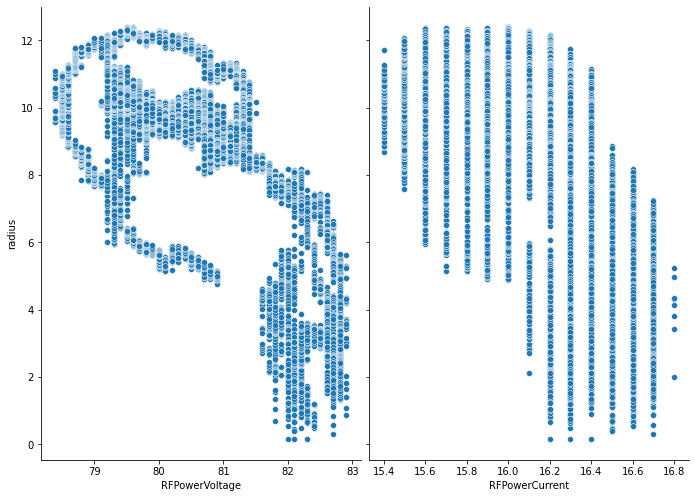

In [13]:
# the features와 response의 관계를 scatterplot으로 그리기
sns.pairplot(df, x_vars=['RFPowerVoltage', 'RFPowerCurrent'], y_vars='radius' ,
             size=7, aspect=0.7, kind='scatter')

### - Feature Selection

In [14]:
# feature variable to X
X = df[['RFPowerVoltage','RFPowerCurrent']]

# response target variable to y
y = df['radius']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

### Modeling 1. Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

121.83660747046756


,Coefficient
RFPowerVoltage,-1.282497
RFPowerCurrent,-0.600126


In [17]:
def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = 100 - (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    return mape


def RMSPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    rmspe = 100 - (np.sqrt(np.mean(((y_test - y_pred) / y_test)**2))*100)
    return rmspe

In [18]:
y_pred_lm = lm.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lm = mean_absolute_error(y_test, y_pred_lm)
rmse_lm = np.sqrt(mean_squared_error(y_test, y_pred_lm))
r_squared_lm = r2_score(y_test, y_pred_lm)
mape_lm = MAPE(y_test, y_pred_lm)
rmspe_lm = RMSPE(y_test, y_pred_lm)

print('### Liner Regressor Metrics ###')
print('Mean_Absolute_Error :' ,mae_lm)
print('Root_Mean_Squared_Error :' ,rmse_lm)
print('R_Square_value :',r_squared_lm)
print('Relative Absolute Error', mape_lm)
print('Root Relative Squared Error', rmspe_lm)

### Liner Regressor Metrics ###
Mean_Absolute_Error : 0.9786355119992769
Root_Mean_Squared_Error : 1.4356150862485133
R_Square_value : 0.4585108340593427
Relative Absolute Error 83.0583689469394
Root Relative Squared Error 36.26009125864241


### Modeling 2. RandomForest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 1234)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r_squared_rf = r2_score(y_test, y_pred_rf)
mape_rf = MAPE(y_test, y_pred_rf)
rmspe_rf = RMSPE(y_test, y_pred_rf)

print('### RandomForest Regressor Metrics ###')
print('Mean_Absolute_Erro :' ,mae_rf)
print('Root_Mean_Squared_Error :' ,rmse_rf)
print('R_Square_value :',r_squared_rf)
print('Mean_Absolute_Percentage_Error', mape_rf)
print('Root Relative squared Error', rmspe_rf)

### RandomForest Regressor Metrics ###
Mean_Absolute_Erro : 0.6482561616642332
Root_Mean_Squared_Error : 1.0728030946335427
R_Square_value : 0.6976195005874094
Mean_Absolute_Percentage_Error 89.04468774744619
Root Relative squared Error 57.96382887661307


### Modeling 3. MLP Regression

In [20]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(8, 8), 
                    learning_rate_init=0.005,
                    max_iter=300,
                    random_state=1234,
                    verbose=1)
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r_squared_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = MAPE(y_test, y_pred_rf)
rmspe_mlp = RMSPE(y_test, y_pred_rf)

Iteration 1, loss = 2.14543765
Iteration 2, loss = 2.07626110
Iteration 3, loss = 2.07759671
Iteration 4, loss = 2.07345780
Iteration 5, loss = 2.07592636
Iteration 6, loss = 2.09257862
Iteration 7, loss = 2.05833333
Iteration 8, loss = 2.06488752
Iteration 9, loss = 2.06182694
Iteration 10, loss = 2.07585038
Iteration 11, loss = 2.09588438
Iteration 12, loss = 2.06884658
Iteration 13, loss = 2.06048545
Iteration 14, loss = 2.04800104
Iteration 15, loss = 2.06728062
Iteration 16, loss = 2.03890960
Iteration 17, loss = 2.04523495
Iteration 18, loss = 2.04617572
Iteration 19, loss = 2.03449435
Iteration 20, loss = 2.03177758
Iteration 21, loss = 2.03829020
Iteration 22, loss = 2.04583754
Iteration 23, loss = 2.02969201
Iteration 24, loss = 2.04974869
Iteration 25, loss = 2.01905057
Iteration 26, loss = 2.02450441
Iteration 27, loss = 2.03750123
Iteration 28, loss = 2.01691941
Iteration 29, loss = 2.02419485
Iteration 30, loss = 2.01412389
Iteration 31, loss = 2.01646787
Iteration 32, los

In [21]:
print('### MLP Regressor Metrics ###')
print('Mean_Absolute_Erro :' ,mae_mlp)
print('Root_Mean_Squared_Error :' ,rmse_mlp)
print('R_Square_value :',r_squared_mlp)
print('Mean_Absolute_Percentage_Error', mape_mlp)
print('Root Relative squared Error', rmspe_mlp)

### MLP Regressor Metrics ###
Mean_Absolute_Erro : 1.2572689361140301
Root_Mean_Squared_Error : 2.001845793862939
R_Square_value : -0.05287056536497081
Mean_Absolute_Percentage_Error 89.04468774744619
Root Relative squared Error 57.96382887661307


## Other Modeling with KFold & GridSearchCV 

In [22]:
## Import models

from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
## Pre-allocate models and corresponding parameter candidates
models = []
params = []

In [24]:
model = ('Ridge', Ridge())
param = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0]
}

models.append(model)
params.append(param)

In [25]:
model = ('Lasso', Lasso())
param = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0]
}

models.append(model)
params.append(param)

In [26]:
model = ('ElasticNet', ElasticNet())
param = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0],
    'l1_ratio': [0.3, 0.5, 0.7]
}

models.append(model)
params.append(param)

In [27]:
model = ('HuberReg', HuberRegressor())
param = {
    'alpha': [0.0001, 0.001, 0.01]
}

models.append(model)
params.append(param)

In [28]:
model = ('CART', DecisionTreeRegressor())
param = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [0.02, 0.05]
}

models.append(model)
params.append(param)

In [29]:
model = ('RandomForest', RandomForestRegressor())

param = {
    "n_estimators" : [10,50,100],
    "max_features" : ["auto", "log2", "sqrt"],
    "bootstrap"    : [True, False]
}

models.append(model)
params.append(param)

In [30]:
model = ('StandardizedKNN', Pipeline([('Standardization', StandardScaler()), ('KNN', KNeighborsRegressor())]))
param = {
    'KNN__n_neighbors': [5, 10, 15, 20, 25, 30],
    'KNN__weights': ['uniform', 'distance']
}

models.append(model)
params.append(param)

In [31]:
from pprint import pprint
pprint(models)
print("=" * 60)
pprint(params)

[('Ridge', Ridge()),
 ('Lasso', Lasso()),
 ('ElasticNet', ElasticNet()),
 ('HuberReg', HuberRegressor()),
 ('CART', DecisionTreeRegressor()),
 ('RandomForest', RandomForestRegressor()),
 ('StandardizedKNN',
  Pipeline(steps=[('Standardization', StandardScaler()),
                ('KNN', KNeighborsRegressor())]))]
[{'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0]},
 {'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0]},
 {'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0], 'l1_ratio': [0.3, 0.5, 0.7]},
 {'alpha': [0.0001, 0.001, 0.01]},
 {'max_depth': [2, 3, 4, 5], 'min_samples_split': [0.02, 0.05]},
 {'bootstrap': [True, False],
  'max_features': ['auto', 'log2', 'sqrt'],
  'n_estimators': [10, 50, 100]},
 {'KNN__n_neighbors': [5, 10, 15, 20, 25, 30],
  'KNN__weights': ['uniform', 'distance']}]


In [32]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics
from datetime import datetime

In [33]:
def gridsearch_cv_for_regression(model, param, kfold, train_input, train_target, scoring='neg_mean_squared_error', n_jobs=-1, tracking=True):

    name = model[0]
    estimator = model[1]
    if tracking:
        start_time = datetime.now()
        print("[%s] Start parameter search for model '%s'" % (start_time, name))
        gridsearch = GridSearchCV(estimator=estimator, param_grid=param, cv=kfold, scoring=scoring, n_jobs=n_jobs)
        gridsearch.fit(train_input, train_target)
        end_time = datetime.now()
        duration_time = (end_time - start_time).seconds
        print("[%s] Finish parameter search for model '%s' (time: %d seconds)" % (end_time, name, duration_time))
        print()
    else:
        gridsearch = GridSearchCV(estimator=estimator, param_grid=param, cv=kfold, scoring=scoring, n_jobs=n_jobs)
        gridsearch.fit(train_input, train_target)
    
    return gridsearch

In [34]:
# Grid search
kfold = KFold(n_splits=10, shuffle=True, random_state=1234)

results = []

for i in range(len(models)):
#for i in range(6):
    model = models[i]
    param = params[i]
    result = gridsearch_cv_for_regression(model=model, param=param, kfold=kfold, train_input=X_train, train_target=y_train)
    print(result.best_score_)
    print(result.best_params_)
    results.append(result)
   

[2021-07-19 15:50:03.998239] Start parameter search for model 'Ridge'
[2021-07-19 15:50:08.428513] Finish parameter search for model 'Ridge' (time: 4 seconds)

-2.0252167301374855
{'alpha': 5.0}
[2021-07-19 15:50:08.428513] Start parameter search for model 'Lasso'
[2021-07-19 15:50:08.651216] Finish parameter search for model 'Lasso' (time: 0 seconds)

-2.044292384599351
{'alpha': 0.1}
[2021-07-19 15:50:08.651713] Start parameter search for model 'ElasticNet'
[2021-07-19 15:50:09.072320] Finish parameter search for model 'ElasticNet' (time: 0 seconds)

-2.0462298330801114
{'alpha': 0.1, 'l1_ratio': 0.7}
[2021-07-19 15:50:09.072320] Start parameter search for model 'HuberReg'
[2021-07-19 15:50:09.733984] Finish parameter search for model 'HuberReg' (time: 0 seconds)

-2.2821939872449297
{'alpha': 0.0001}
[2021-07-19 15:50:09.733984] Start parameter search for model 'CART'
[2021-07-19 15:50:10.061839] Finish parameter search for model 'CART' (time: 0 seconds)

-1.1289755002519715
{'max_d

## Test Model
1. Ridge
1. Lasso
1. ElasticNet
1. HuberRegression
1. CART
1. RandomForest
1. Standardized KNN

In [35]:
for i in range(len(results)):
    y_test_hat = results[i].predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))
    mae = metrics.mean_absolute_error(y_test, y_test_hat)
    r2 = metrics.r2_score(y_test, y_test_hat)
    mape = MAPE(y_test, y_test_hat)
    rmspe = RMSPE(y_test, y_test_hat)
    
    print("## %s | RMSE: %.4f, MAE: %.4f, R-square: %.4f, Relative Absolute Error: %.4f%%" % (models[i][0], rmse, mae, r2, mape))

## Ridge | RMSE: 1.4356, MAE: 0.9785, R-square: 0.4585, Relative Absolute Error: 83.0583%
## Lasso | RMSE: 1.4407, MAE: 0.9535, R-square: 0.4547, Relative Absolute Error: 82.9394%
## ElasticNet | RMSE: 1.4412, MAE: 0.9516, R-square: 0.4543, Relative Absolute Error: 82.9266%
## HuberReg | RMSE: 1.5140, MAE: 0.8905, R-square: 0.3978, Relative Absolute Error: 81.8130%
## CART | RMSE: 1.0701, MAE: 0.6489, R-square: 0.6991, Relative Absolute Error: 89.0134%
## RandomForest | RMSE: 1.0730, MAE: 0.6477, R-square: 0.6975, Relative Absolute Error: 89.0585%
## StandardizedKNN | RMSE: 1.0783, MAE: 0.6633, R-square: 0.6945, Relative Absolute Error: 88.9144%
